In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_excel("../data/Sample-Superstore.xlsx", sheet_name = "Orders", header= 0)
df.head()

d:\Study\cours_d_info\Data science\Business analysis\Projet_BI_performance_commerciale\env\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Visualisation Clés pour analyse commerciale

In [3]:
# Top 10 des produits les plus vendus
top_10_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

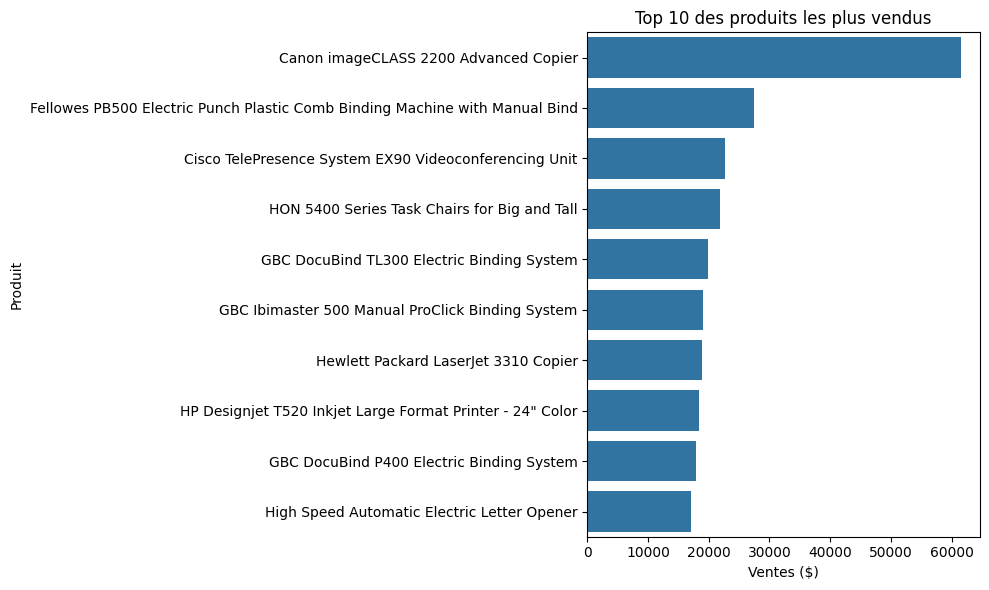

In [4]:
plt.figure(figsize=(10,6))
sns.barplot(x= top_10_products.values, y = top_10_products.index)
plt.title("Top 10 des produits les plus vendus")
plt.xlabel("Ventes ($)")
plt.ylabel("Produit")
plt.tight_layout()
plt.show()

In [5]:
# Top 10 des meilleurs clients
top_10_clients = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(10)

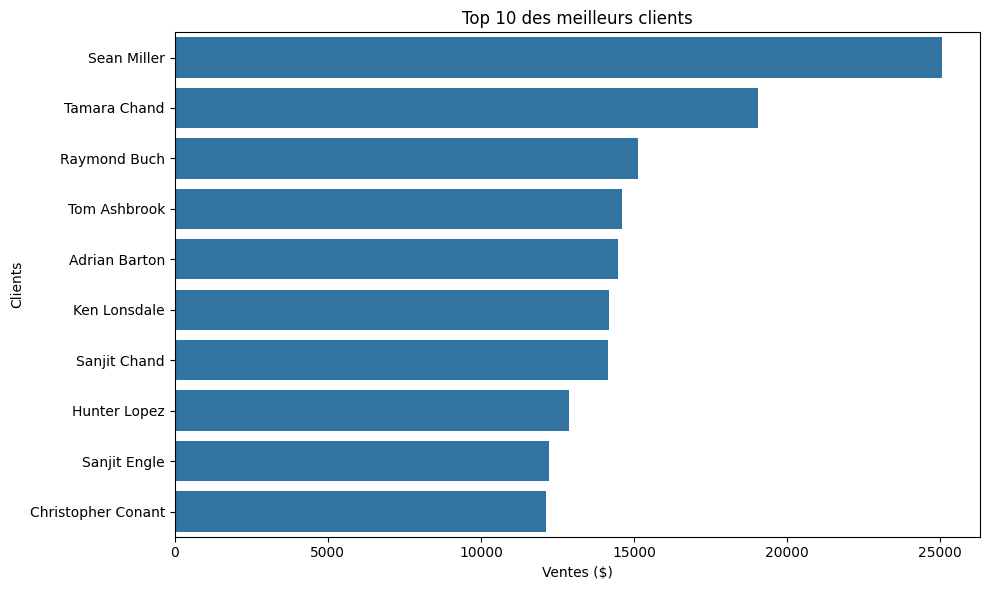

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(x= top_10_clients.values, y = top_10_clients.index)
plt.title("Top 10 des meilleurs clients")
plt.xlabel("Ventes ($)")
plt.ylabel("Clients")
plt.tight_layout()
plt.show()

In [7]:
# Répartition des ventes par région 
sales_by_region = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
sales_by_region

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

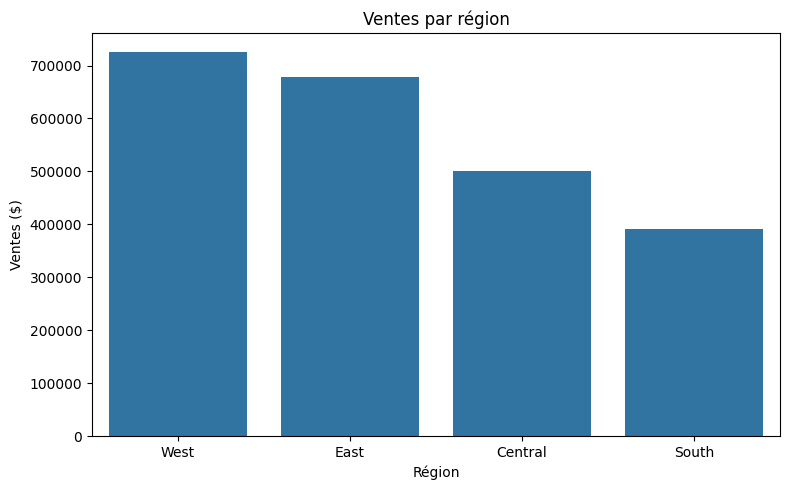

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values)
plt.title("Ventes par région")
plt.ylabel("Ventes ($)")
plt.xlabel("Région")
plt.tight_layout()
plt.show()

In [9]:
# Évolution des ventes dans le temps
df["Order date"] = pd.to_datetime(df['Order Date'])
df["Year-Month"] = df['Order Date'].dt.to_period('M')

monthly_sales = df.groupby('Year-Month')['Sales'].sum()

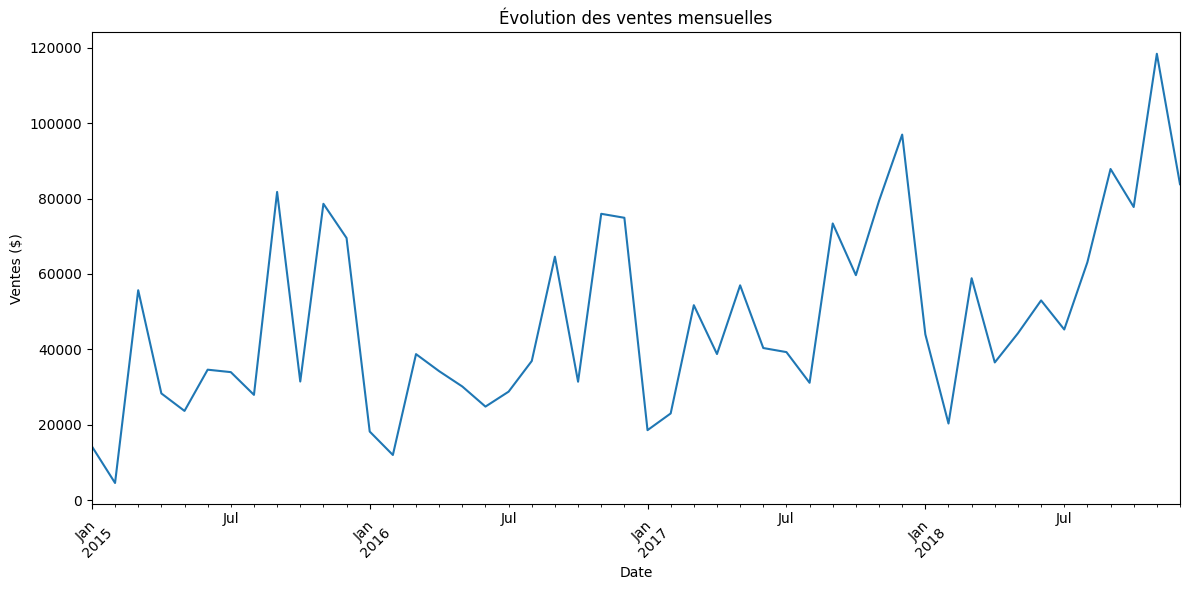

In [10]:
plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title("Évolution des ventes mensuelles")
plt.ylabel("Ventes ($)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()